*   Cleaning a dataset of credit taken by people of various social background
*   Visualizing the values in various graphs



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
datas = pd.read_csv('https://raw.githubusercontent.com/BriceNW/UE_AAA/main/german_credit_data.csv')

In [ ]:
datas.drop([datas.columns[0]], axis=1,inplace=True)
datas.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [ ]:
#Sorting people of the dataset into categories depending on the amount of their savings
little = datas['Saving accounts'].value_counts().tolist()[0]
moderate = datas['Saving accounts'].value_counts().tolist()[1]
quite_rich = datas['Saving accounts'].value_counts().tolist()[2]
rich = datas['Saving accounts'].value_counts().tolist()[3]


# Filling 'Nan' values by the category that is the most present in the dataset
mean_1 = (little+moderate+quite_rich+rich)/4

if mean_1 <= datas['Saving accounts'].value_counts().tolist()[0]:
  na_sac = 'little'
elif datas['Saving accounts'].value_counts().tolist()[0] < mean_1 <= datas['Saving accounts'].value_counts().tolist()[1]:
  na_sac = 'moderate'
elif datas['Saving accounts'].value_counts().tolist()[1] < mean_1 <= datas['Saving accounts'].value_counts().tolist()[2]:
  na_sac = 'quite rich'
else:
  na_sac = 'rich'

datas['Saving accounts'].fillna(na_sac, inplace=True)


# Same process for the checking account
little = datas['Checking account'].value_counts().tolist()[0]
moderate = datas['Checking account'].value_counts().tolist()[1]
rich = datas['Checking account'].value_counts().tolist()[2]

mean_2 = (little+moderate+rich)/3

if mean_2 <= datas['Checking account'].value_counts().tolist()[0]:
  na_cac = 'little'
elif datas['Checking account'].value_counts().tolist()[0] < mean_2 <= datas['Saving accounts'].value_counts().tolist()[1]:
  na_cac = 'moderate'
else:
  na_cac = 'rich'

datas['Saving accounts'].fillna(na_cac, inplace=True)

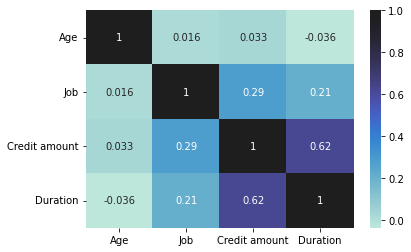

In [ ]:
sns.heatmap(datas.corr(), annot=True, center=1.0)

In [ ]:
#Sorting people by age bracket in a new column:
datas['groupes ages'] = datas['Age'].apply(lambda x : 'jeune' if x <= 35.0 else 'moyen' if 35.0<x<55.0 else 'vieux')

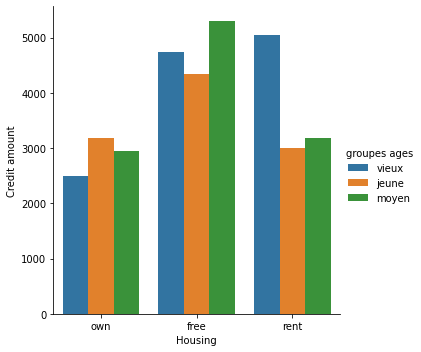

In [ ]:
#Visualizing different values of the dataset depending on the age bracket people belong to
sns.catplot(data = datas, x = 'Housing', y = 'Credit amount', hue = 'groupes ages', kind = 'bar', ci=None)

In [ ]:
fig, axes = plt.subplots(2,2)
sns.heatmap(datas.corr(), annot=True, center=1.0, ax=axes[0,0])
sns.boxplot(datas.Age, ax=axes[0,1])
sns.violinplot(y = datas['Age'], x = datas['Checking account'], ax=axes[1,0])
sns.barplot(x = datas.Age, y = datas['Credit amount'] ,ax=axes[1,1])